<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 
### Midterm - In-class Exam



---
#### Guidelines 
- This is your notebook for your in-class midterm exam. 
- You are required to submit your answers using this notebook (do not push or submit PDFs, Word docs, etc, if you do, your answers will be considered invalid = **0%**).
- The in-class exam is **10%** of your total midterm score.
- During the exam you can only have the following websites open in your browser:
    * [ECON-628-01 github][1]
    * ECON-628-01-yourgithubusersname 
    * [StackOverflow][2]  
- If we noticed that your computer browser has other websites open, you will be asked to **close your computer, leave the class, and will get an score of 0%**
- Remember: if you are using code from someone else/online (StackOverflow) you need:
    - Cite the website from where you are getting the code.
    - **Explain on your "own words" what the code is doing.**
    - If you fail to do this, your grade will be **penalized.**
    


- Once you are done with your exam use this [link][3] to **submit** the GitHub link to your take home exam.
[1]:https://github.com/jrcmalunay/ECON628-01 "ECON-628-01 github"
[2]:http://stackoverflow.com "StackOverflow"
[3]: https://docs.google.com/forms/d/e/1FAIpQLSercXrXIky91taz98tPviIqA8C0FaQZ_WIfNoRYxMbV5wPtkg/viewform "link"

---



### Dataset 
This dataset comes from the Sleep and the allocation of time [paper][1] by Biddle, Jeff and Hamermesh, Daniel where using aggregated data for 12 countries, a cross section of microeconomic data, and a panel of households, they demonstrate that increases in time in the labor market reduce sleep!!!! The variables are:
https://www.jstor.org/stable/2937618?seq=1#page_scan_tab_contents

| **Name**   |      **Description**     |  
|----------|:-------------:|
| age | in years | 
| black | =1 if black | 
| case | identifier | 
| clerical | =1 if clerical worker |
| construc | =1 if construction worker |
| educ | years of schooling|
| earns74 | total earnings, 1974 |
| gdhlth | =1 if in good or excellent health |
| inlf |  =1 if in labor force |
|leis1  |sleep - totwrk|
|leis2  |slpnaps - totwrk|
|leis3  |rlxall - totwrk|
| smsa |  =1 if living in SMSA |
| | SMSA is the Standard Metropolitan Statistical Area, an integrated economic and social unit having a large population nucleus. It is a good indicator of living in a city.|
|lhrwage| log hourly wage|
|lothinc | log othinc, unless othinc < 0
| male |  =1 if male |
| marr | =1 if married |
| prot | =1 if Protestant |
|rlxall |slpnaps + personal activs|
| selfe  | =1 if self employed|
| sleep | minutes sleep at night, per week |
| slpnaps | minutes sleep, including naps, per week |
| south |  =1 if live in south |
| spsepay |  spousal wage income |
| spwrk75 |  =1 if spouse works |
| totwrk | minutes worked per week |
| union |  =1 if belong to union |
| worknrm | minutes work main job |
| workscnd | minutes work second job |
|exper     | age - educ - 6 |
| yngkid | =1 if children less than 3 years present |
| yrsmarr | years married |
| hrwage | hourly wage |
|agesq   |age^2|


[1]:https://core.ac.uk/download/pdf/6820141.pdf "paper"


---


---

## The Scenario
---
The PI (principal investigator) of a project you are working for, claims that nowadays people sleep "more" because access to the internet and the mechanization of labor reduces their work time. Based on this assumption, he wants to implement a literacy program that requires participants to read 1 chapter of a book one hour before their bed time and one section of an introduction to mathematics book one hour before they leave their home for work.

**He asks you to find out if people are indeed sleeping more or not, before he implements the literacy program.** 
Assume that, you don't have any other dataset but the one from the Biddle and Hamermesh paper to answer this question. 
Use all the predictive methods, you consider neccesary to give  an answer to the PI, and make sure you explain the output of your predictive analysis.


---

### Basic package imports
---

In [331]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

## 1. Read/load the dataset "sleep_bh.csv" and do an initial overview of the data
    Check the shape of your data
    Cheeck the type of values
    Identify which variables have missing values
    Print a list of the indices where there are missing values
---

In [332]:
### P.S.:In my Midterm exam, most of the codes are from professor mario carrillo's lecture notes.

In [333]:
dfCH_path = '/Users/ChrisH/Desktop/ECON628-01-chrishy2ma/datasets/sleep/sleep_bh.csv'
dfCH= pd.read_csv(dfCH_path)
dfCH

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.000000,0.000000,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.000000,0.000000,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.000000,0.000000,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.000000,0.000000,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.000000,0.000000,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096
5,41,0,6,0.000000,0.000000,12,0,1,1,4812,...,0,1205,0,0,1205,23,0,23,19.249998,1681
6,35,0,7,0.000000,0.000000,12,8250,1,1,4787,...,1,2113,0,2113,0,17,1,0,1.440000,1225
7,47,0,8,0.000000,0.000000,13,0,1,1,3544,...,0,3608,0,3608,0,28,0,24,15.010007,2209
8,32,0,9,0.000000,0.000000,17,18750,1,1,4359,...,0,2353,1,2353,0,9,0,11,4.329998,1024
9,30,0,10,0.000000,0.000000,15,11750,1,1,4211,...,1,2851,0,2851,0,9,0,7,2.959999,900


In [334]:
dfCH.shape

(706, 34)

In [335]:
dfCH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 34 columns):
age         706 non-null int64
black       706 non-null int64
case        706 non-null int64
clerical    706 non-null float64
construc    706 non-null float64
educ        706 non-null int64
earns74     706 non-null int64
gdhlth      706 non-null int64
inlf        706 non-null int64
leis1       706 non-null int64
leis2       706 non-null int64
leis3       706 non-null int64
smsa        706 non-null int64
lhrwage     532 non-null float64
lothinc     706 non-null float64
male        706 non-null int64
marr        706 non-null int64
prot        706 non-null int64
rlxall      706 non-null int64
selfe       706 non-null int64
sleep       706 non-null int64
slpnaps     706 non-null int64
south       706 non-null int64
spsepay     706 non-null int64
spwrk75     706 non-null int64
totwrk      706 non-null int64
union       706 non-null int64
worknrm     706 non-null int64
workscnd    706 non

In [336]:
dfCH.isnull().sum()

age           0
black         0
case          0
clerical      0
construc      0
educ          0
earns74       0
gdhlth        0
inlf          0
leis1         0
leis2         0
leis3         0
smsa          0
lhrwage     174
lothinc       0
male          0
marr          0
prot          0
rlxall        0
selfe         0
sleep         0
slpnaps       0
south         0
spsepay       0
spwrk75       0
totwrk        0
union         0
worknrm       0
workscnd      0
exper         0
yngkid        0
yrsmarr       0
hrwage      174
agesq         0
dtype: int64

In [337]:
dfCH.loc[dfCH['hrwage'].isnull()]

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
532,34,0,533,0.182331,0.030075,17,0,1,0,3922,...,0,2443,0,2403,40,11,0,14,NaN,1156
533,44,1,534,0.182331,0.030075,15,0,1,0,5635,...,0,995,0,995,0,23,0,22,NaN,1936
534,58,0,535,0.182331,0.030075,15,0,1,0,4370,...,0,1975,0,1975,0,37,0,29,NaN,3364
535,29,0,536,0.182331,0.030075,16,13750,1,0,4672,...,1,1313,0,1313,0,7,0,5,NaN,841
536,39,0,537,0.182331,0.030075,12,9500,1,0,3310,...,0,4000,0,4000,0,21,0,20,NaN,1521
537,41,0,538,0.182331,0.030075,17,42500,1,0,3802,...,1,3518,0,3518,0,18,0,18,NaN,1681
538,55,0,539,0.182331,0.030075,12,9500,1,0,5792,...,1,188,0,188,0,37,0,26,NaN,3025
539,28,0,540,0.182331,0.030075,12,10500,1,0,7280,...,1,0,0,0,0,10,1,10,NaN,784
540,41,0,541,0.182331,0.030075,12,0,1,0,3777,...,0,3438,0,3438,0,23,0,21,NaN,1681
541,46,0,542,0.182331,0.030075,8,9500,1,0,5500,...,1,1150,0,1150,0,32,0,28,NaN,2116


In [338]:
dfCH.loc[dfCH['lhrwage'].isnull()]

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
532,34,0,533,0.182331,0.030075,17,0,1,0,3922,...,0,2443,0,2403,40,11,0,14,NaN,1156
533,44,1,534,0.182331,0.030075,15,0,1,0,5635,...,0,995,0,995,0,23,0,22,NaN,1936
534,58,0,535,0.182331,0.030075,15,0,1,0,4370,...,0,1975,0,1975,0,37,0,29,NaN,3364
535,29,0,536,0.182331,0.030075,16,13750,1,0,4672,...,1,1313,0,1313,0,7,0,5,NaN,841
536,39,0,537,0.182331,0.030075,12,9500,1,0,3310,...,0,4000,0,4000,0,21,0,20,NaN,1521
537,41,0,538,0.182331,0.030075,17,42500,1,0,3802,...,1,3518,0,3518,0,18,0,18,NaN,1681
538,55,0,539,0.182331,0.030075,12,9500,1,0,5792,...,1,188,0,188,0,37,0,26,NaN,3025
539,28,0,540,0.182331,0.030075,12,10500,1,0,7280,...,1,0,0,0,0,10,1,10,NaN,784
540,41,0,541,0.182331,0.030075,12,0,1,0,3777,...,0,3438,0,3438,0,23,0,21,NaN,1681
541,46,0,542,0.182331,0.030075,8,9500,1,0,5500,...,1,1150,0,1150,0,32,0,28,NaN,2116


## 2. Drop missing values (not the best practice), but OK for exam 
    Once you drop the missing values, check that the list of binary variables have values of 1 an 0
        Note: at this point the inlf predictor/variable should have the value of 1
---

In [339]:
dfCH=dfCH.dropna(how='any')

In [340]:
## check whether missing values are dropped 
dfCH.isnull().sum()

age         0
black       0
case        0
clerical    0
construc    0
educ        0
earns74     0
gdhlth      0
inlf        0
leis1       0
leis2       0
leis3       0
smsa        0
lhrwage     0
lothinc     0
male        0
marr        0
prot        0
rlxall      0
selfe       0
sleep       0
slpnaps     0
south       0
spsepay     0
spwrk75     0
totwrk      0
union       0
worknrm     0
workscnd    0
exper       0
yngkid      0
yrsmarr     0
hrwage      0
agesq       0
dtype: int64

In [341]:
dfCH

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.0,0.0,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.0,0.0,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.0,0.0,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.0,0.0,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.0,0.0,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096
5,41,0,6,0.0,0.0,12,0,1,1,4812,...,0,1205,0,0,1205,23,0,23,19.249998,1681
6,35,0,7,0.0,0.0,12,8250,1,1,4787,...,1,2113,0,2113,0,17,1,0,1.440000,1225
7,47,0,8,0.0,0.0,13,0,1,1,3544,...,0,3608,0,3608,0,28,0,24,15.010007,2209
8,32,0,9,0.0,0.0,17,18750,1,1,4359,...,0,2353,1,2353,0,9,0,11,4.329998,1024
9,30,0,10,0.0,0.0,15,11750,1,1,4211,...,1,2851,0,2851,0,9,0,7,2.959999,900


## 3. Check for correlations
    Implement a correlation heatmap
---

In [342]:
dfCH.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 531
Data columns (total 34 columns):
age         532 non-null int64
black       532 non-null int64
case        532 non-null int64
clerical    532 non-null float64
construc    532 non-null float64
educ        532 non-null int64
earns74     532 non-null int64
gdhlth      532 non-null int64
inlf        532 non-null int64
leis1       532 non-null int64
leis2       532 non-null int64
leis3       532 non-null int64
smsa        532 non-null int64
lhrwage     532 non-null float64
lothinc     532 non-null float64
male        532 non-null int64
marr        532 non-null int64
prot        532 non-null int64
rlxall      532 non-null int64
selfe       532 non-null int64
sleep       532 non-null int64
slpnaps     532 non-null int64
south       532 non-null int64
spsepay     532 non-null int64
spwrk75     532 non-null int64
totwrk      532 non-null int64
union       532 non-null int64
worknrm     532 non-null int64
workscnd    532 non

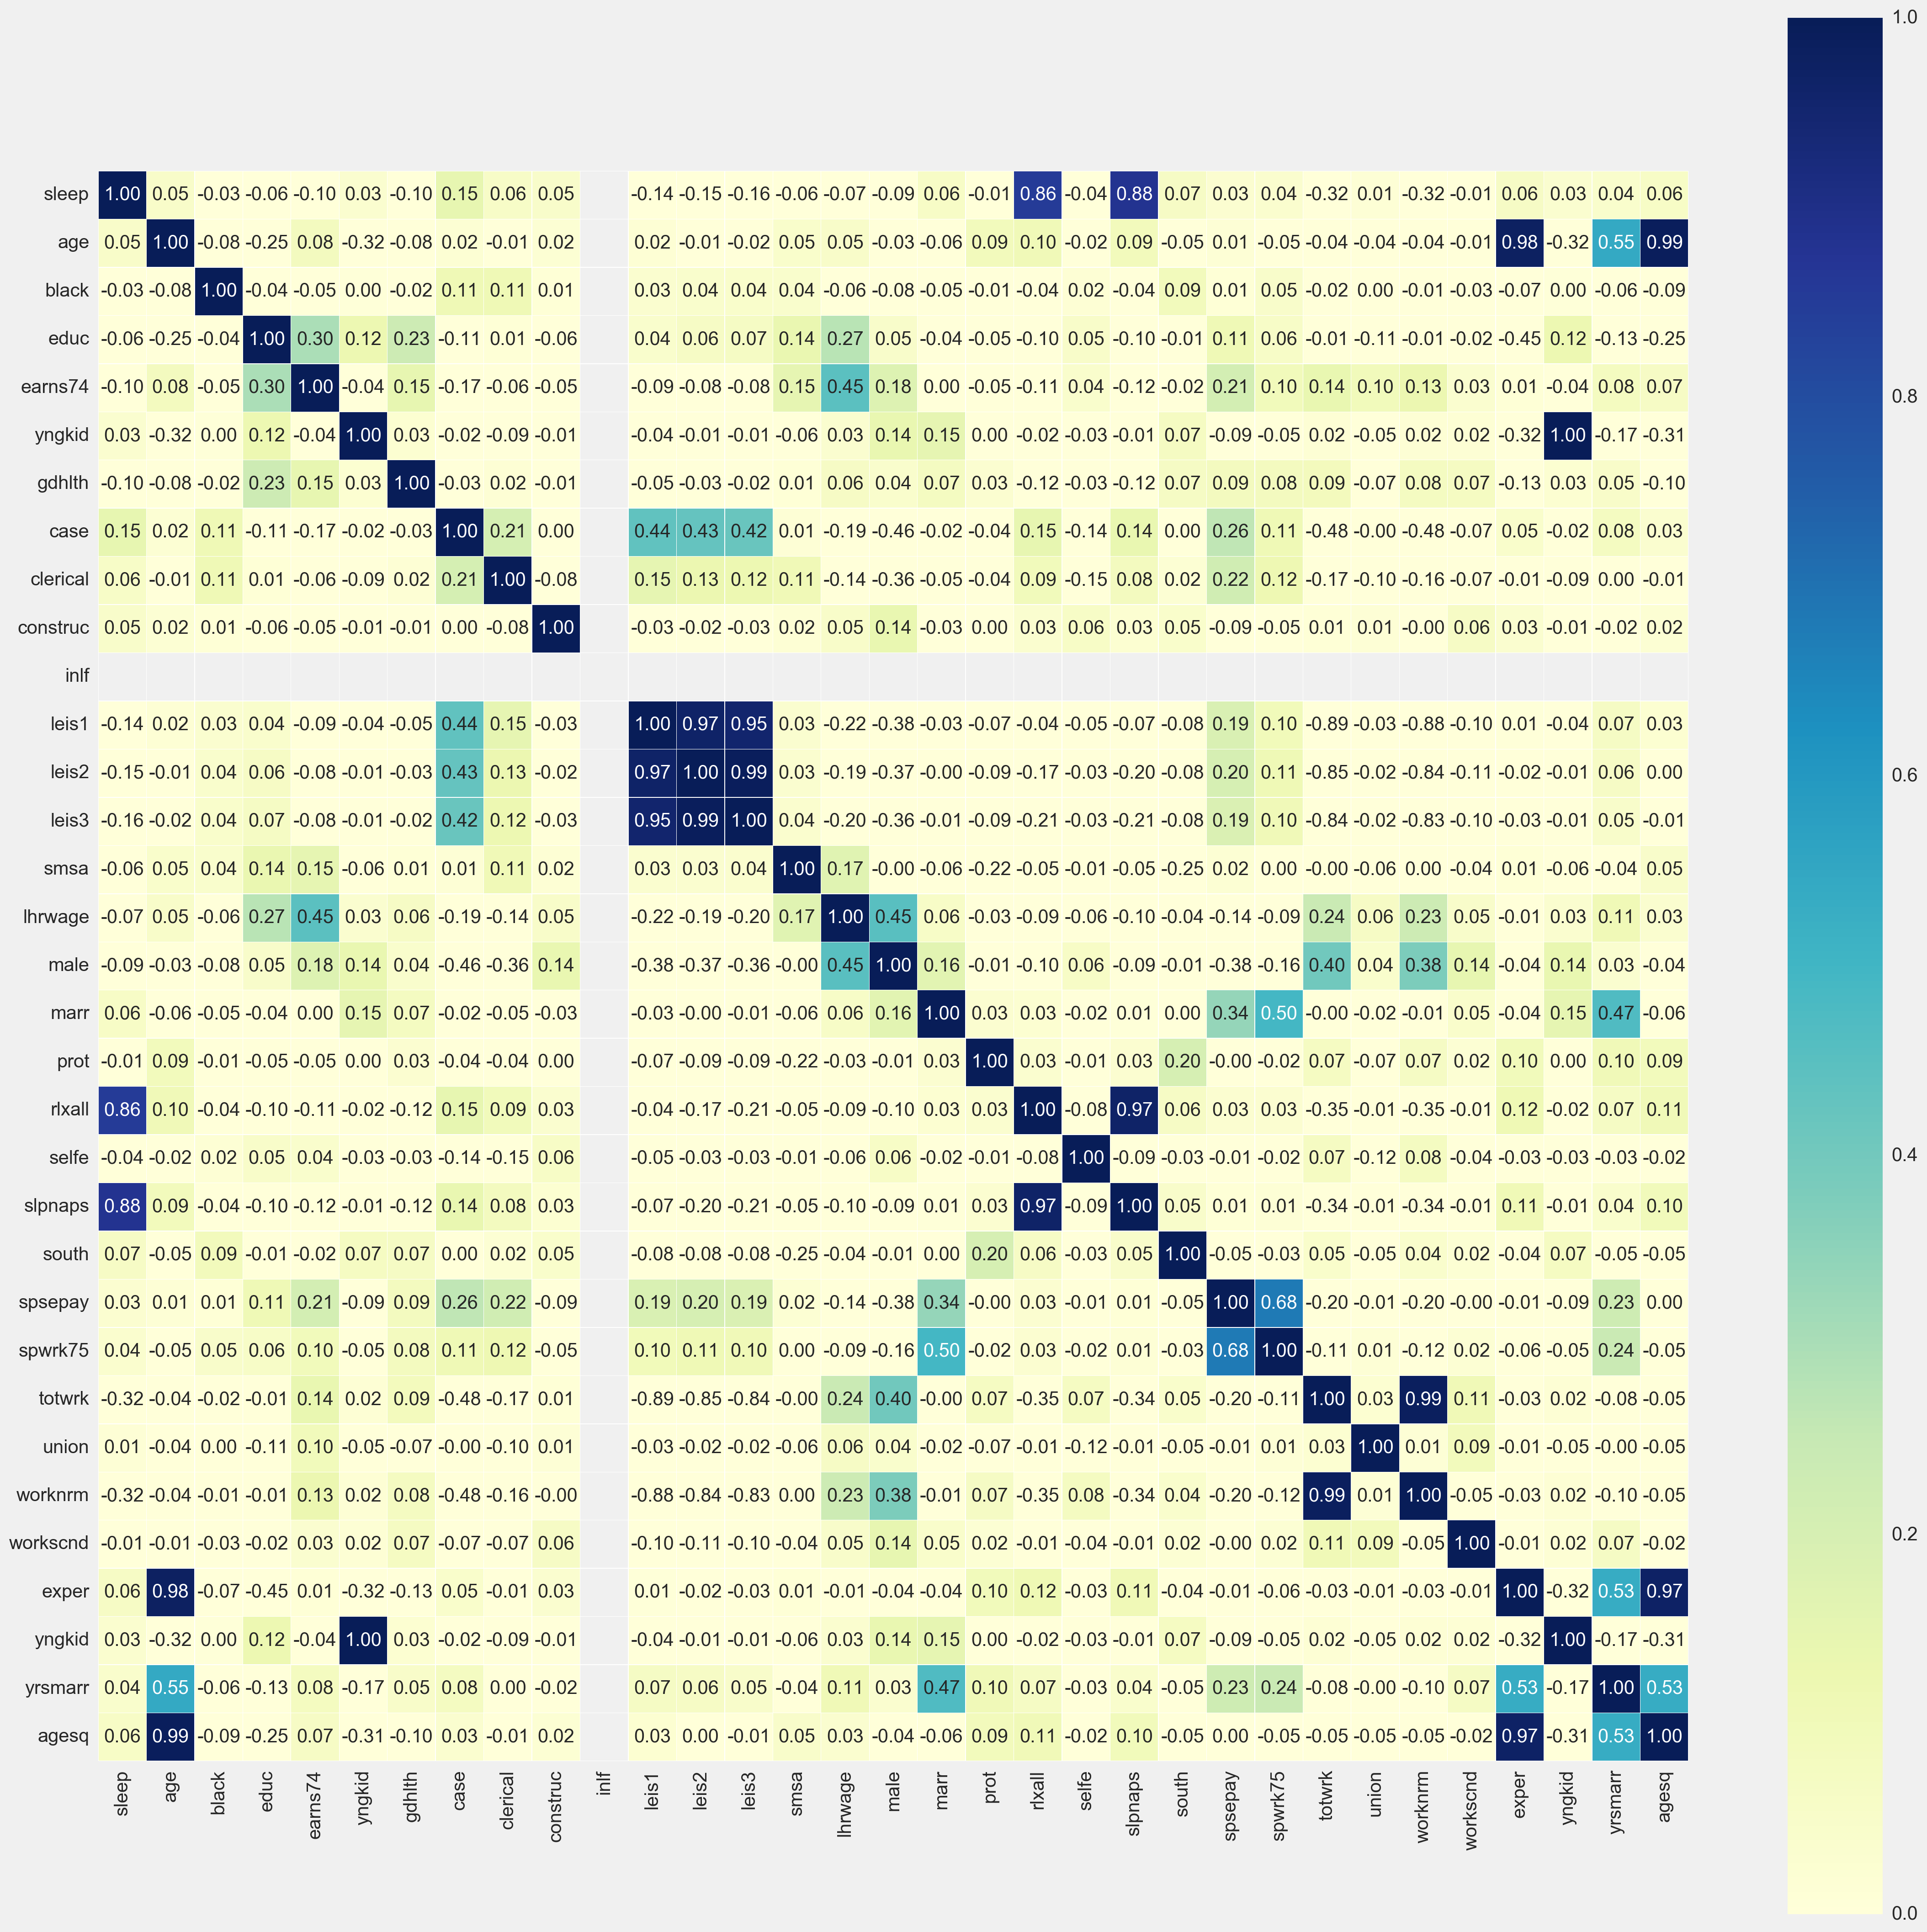

In [343]:
cols = ['sleep','age', 'black', 'educ', 'earns74','yngkid','gdhlth','case','clerical','construc','inlf','leis1','leis2','leis3','smsa','lhrwage','male','marr','prot','rlxall','selfe','slpnaps','south','spsepay','spwrk75','totwrk','union','worknrm','workscnd','exper','yngkid','yrsmarr','agesq']
fig = plt.figure(figsize=(25,25))
ax = fig.gca()

cm = np.corrcoef(dfCH[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 cmap="YlGnBu", 
                 vmin=0, 
                 vmax=1,
                 linewidths= .15, 
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols,
                 ax=ax)
plt.show()

## 4.1 Predictions
    Define y (mins sleep at night, per week)
    Define X (where X are your predictors => make sure to include the correct variables, i.e. exclude y, case, lothinc, and **other** variables)
    Standarized your Xs
    Train test split:
        splits your data into train test, 
        assigns a size of 30% to your test set, and use random_state=10
        print the shape of your train (X, y) and test (X, y)
---

In [346]:
## Define Y
Y=dfCH['sleep']
## Define X
X=dfCH[['agesq','educ','selfe','lhrwage','rlxall','slpnaps','totwrk','worknrm','exper']]

## 4.2 Machine Learning models 
    OLS, Regularization methods and evaluate the performance of your models on the train and test datasets
    Cross validate at least 10 times the R^2 scores of your models and print the average R^2 scores 
    For the OLS implement an scatter plot that shows the relation between your predicted values and the y_test values (the actual values)
    
---

In [347]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() ## We are going to normalize

# use the "fit_transform" function to normalize the X dmatrix
Xn = ss.fit_transform(X)

In [348]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xn, y, test_size=0.3, random_state=10)
print X_train.shape, X_test.shape
print "\n======\n"
print y_train.shape, y_test.shape

(372, 9) (160, 9)


(372,) (160,)


## 4.2.1 OLS
    
---

In [349]:
from sklearn.linear_model import LinearRegression

## define a linear regression model
lr = LinearRegression()

## fit your model
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [350]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [351]:
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

## Cross validate = 10
linreg_scores = cross_val_score(lr, X_train, y_train, cv=10)
ytrain_pred = lr.predict(X_train)
ytest_pred = lr.predict(X_test)

## Print the R^2
print linreg_scores
print "Average R^2 OLS score: %.3f" % (np.mean(linreg_scores))

[ 0.77185623  0.83000029  0.67548088  0.90395376  0.64595854  0.86095601
  0.8366906   0.5955225   0.68773785  0.92923603]
Average R^2 OLS score: 0.774


In [352]:
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "OLS", lr)

MSE OLS train data: 38479.31, test data: 46292.39
R^2 OLS train data: 0.80, test data: 0.74


In [353]:
## We can see, MES is 38479.31, which is very high.Hence, we still have a long way to go.
## R^2 of training data is 0.80 , test data=0.74
## average R^2 ols score=0.777

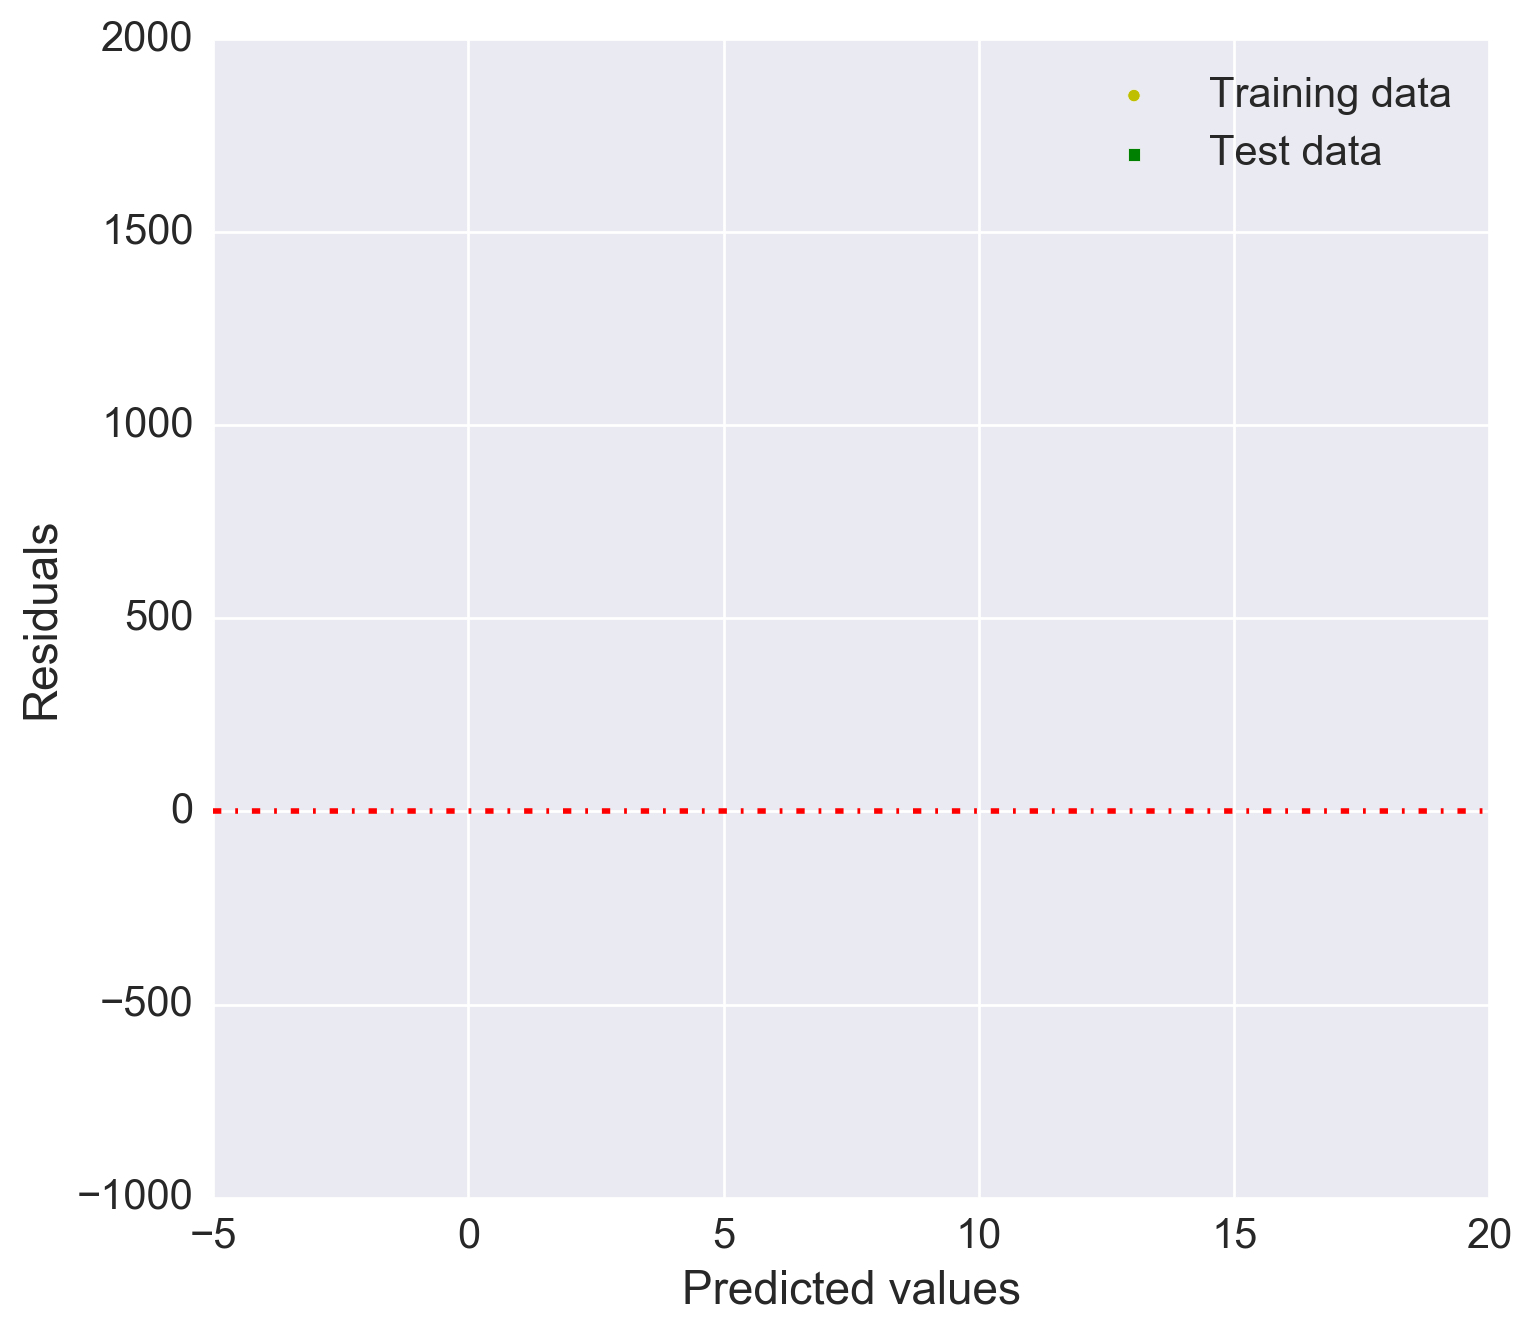

In [354]:
fig = plt.figure(figsize=(8,7))

plt.scatter(ytrain_pred,  ytrain_pred - ytrain,
            c='y', marker='o', label='Training data')

plt.scatter(ytest_pred,  ytest_pred - ytest,
            c='g', marker='s', label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper right')
plt.hlines(y=0, xmin=-5, xmax=20, lw=2, linestyles= '-.', color='red')
plt.xlim([-5, 20])
plt.tight_layout()

plt.show()

In [355]:
## In the graph we see a "perfect prediction" = the residuals are exactly zero
## It looks like we are overfitting our model

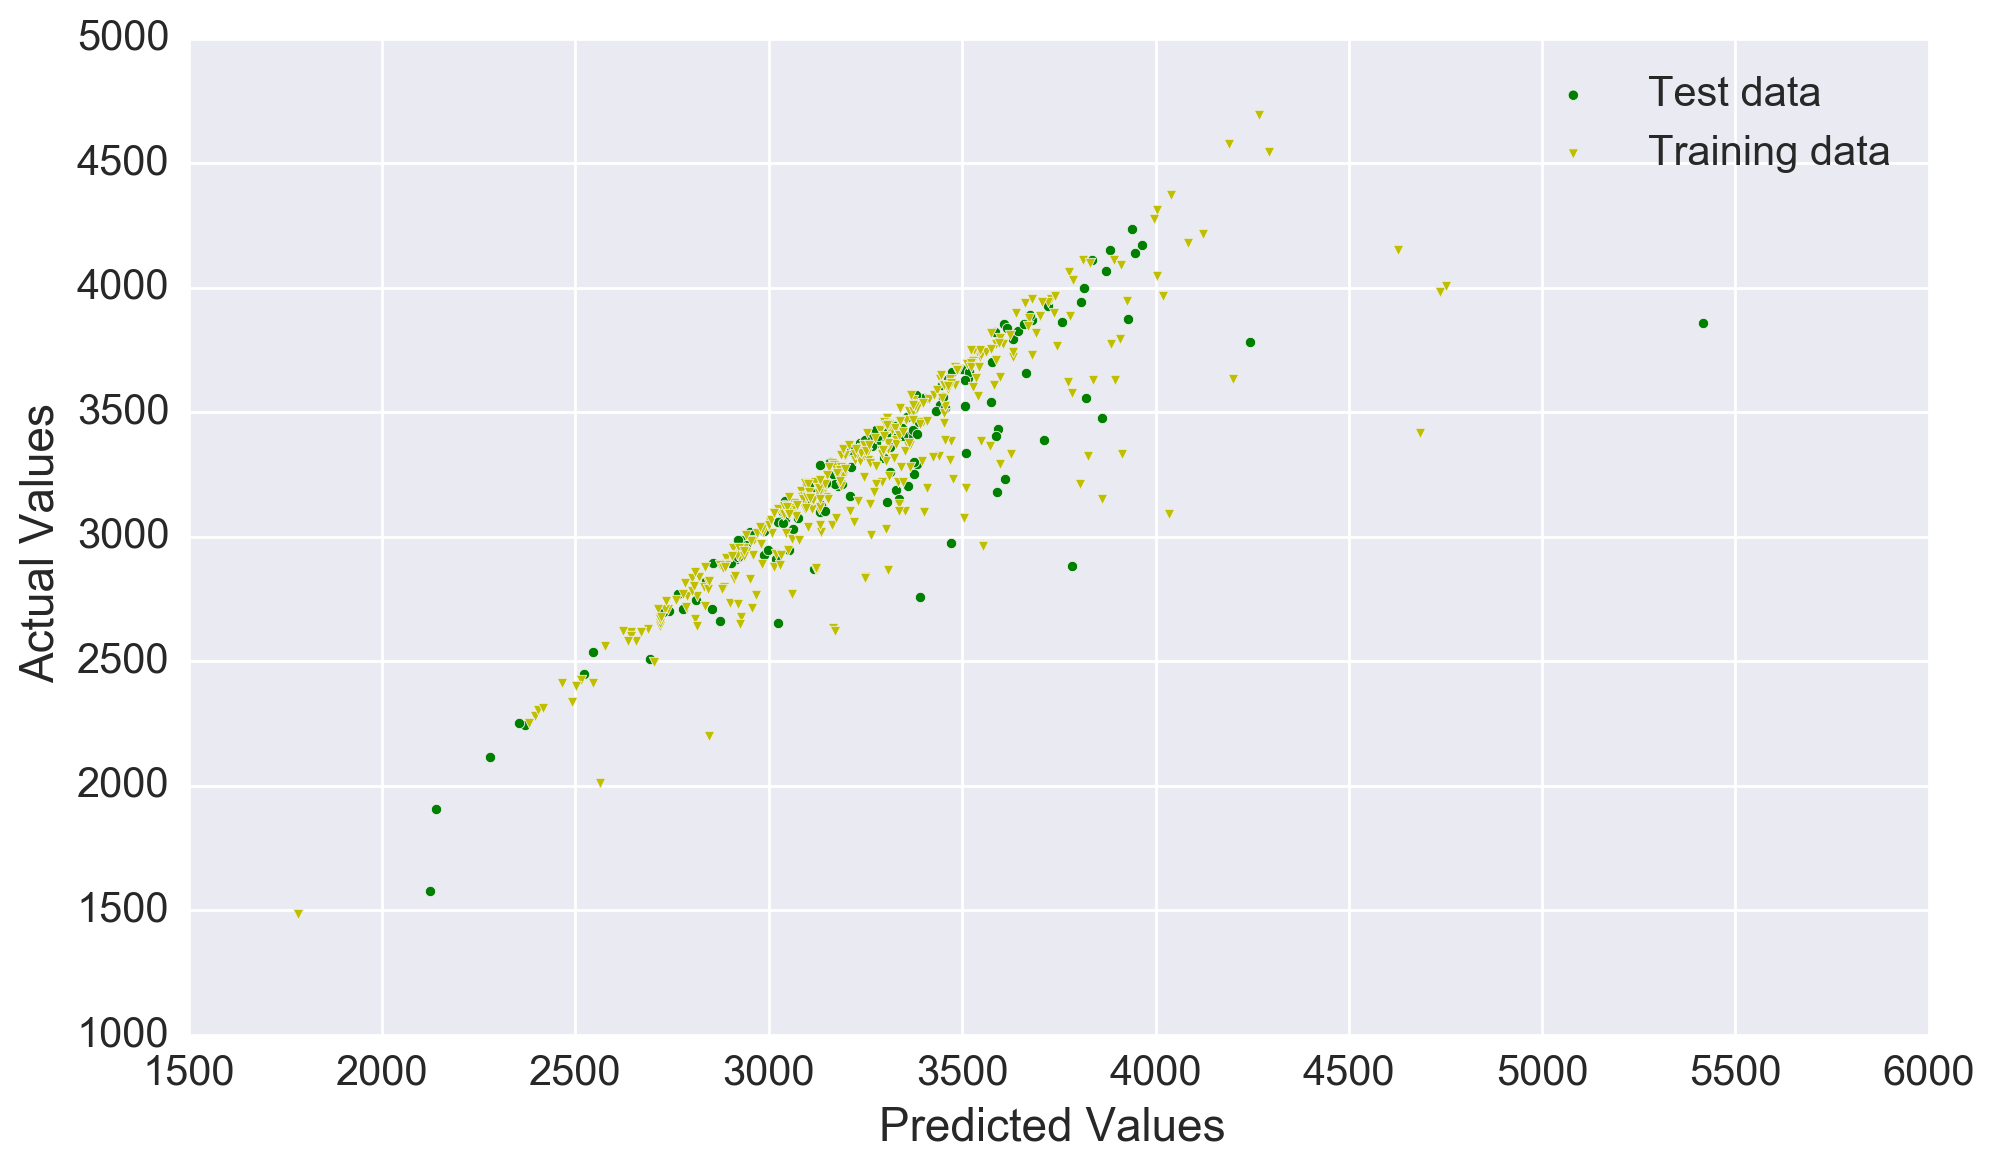

In [356]:
## Here we are plotting the predicted values for our train and test data set
fig = plt.figure(figsize=(10,6))
plt.scatter(ytest_pred, ytest, s=14, c='g', marker='o', label='Test data')
plt.scatter(ytrain_pred, ytrain, s=14, c='y', marker='v', label='Training data')
plt.xlabel("Predicted Values ")
plt.ylabel("Actual Values ")
plt.legend(loc='upper right')
plt.show()

## 4.2.2 Regularization
    
---

In [357]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

In [358]:
ridge_alphas = np.logspace(0, 5, 200) 

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(Xtrain, ytrain)
print (optimal_ridge.alpha_)

1.0


In [359]:
## Implement the Ridge Regression
ridge = Ridge(alpha=optimal_ridge.alpha_)

## Fit the Ridge regression
ridge.fit(Xtrain, ytrain)
ytrain_pred_ridge = ridge.predict(Xtrain)
ytest_pred_ridge = ridge.predict(Xtest)
# print(ridge.coef_)
# print "=====\n"


## Cross validate = 10
ridge_scores = cross_val_score(ridge, Xtrain, ytrain, cv=10)
## Print the R^2
print ridge_scores
print "Average R^2 Ridge score: %.3f" % (np.mean(ridge_scores))

[ 0.77399833  0.8304274   0.67586074  0.90458229  0.65137353  0.8601905
  0.8383908   0.608262    0.68476089  0.93211016]
Average R^2 Ridge score: 0.776


In [360]:
print('MSE - Ridge train: %.3f, test: %.3f' % (
        mean_squared_error(ytrain, ytrain_pred_ridge),
        mean_squared_error(ytest, ytest_pred_ridge)))
print('R^2 - Ridge train: %.3f, test: %.3f' % (
        r2_score(ytrain, ytrain_pred_ridge),
        r2_score(ytest, ytest_pred_ridge)))

MSE - Ridge train: 38501.814, test: 46128.041
R^2 - Ridge train: 0.795, test: 0.742


In [361]:
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(Xtrain, ytrain)

print optimal_lasso.alpha_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

16.6238209151


..........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished


In [362]:
## Implement the Lasso Regression
lasso = Lasso(alpha=optimal_lasso.alpha_)

## fit your regression
lasso.fit(Xtrain, ytrain)
ytrain_pred_lasso = lasso.predict(Xtrain)
ytest_pred_lasso = lasso.predict(Xtest)
# print(lasso.coef_)
# print "====\n"

lasso_scores = cross_val_score(lasso, Xtrain, ytrain, cv=10)
print lasso_scores
print "Average R^2 Lasso score: %.3f" % (np.mean(lasso_scores))

[ 0.77680987  0.82634146  0.6986112   0.90347045  0.65564487  0.85185434
  0.82015647  0.61956422  0.70691755  0.92360028]
Average R^2 Lasso score: 0.778


In [363]:
print('MSE - Lasso train: %.3f, test: %.3f' % (
        mean_squared_error(ytrain, ytrain_pred_lasso),
        mean_squared_error(ytest, ytest_pred_lasso)))
print('R^2 - Lasso train: %.3f, test: %.3f' % (
        r2_score(ytrain, ytrain_pred_lasso),
        r2_score(ytest, ytest_pred_lasso)))

MSE - Lasso train: 39254.149, test: 46248.530
R^2 - Lasso train: 0.791, test: 0.741


In [364]:
## Find an optimal value for Elastic Net regression alpha using ElasticNetCV
l1_ratios = np.linspace(0.01, 1.0, 50)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=300, cv=5,
                            verbose=1)
optimal_enet.fit(Xtrain, ytrain)

print optimal_enet.alpha_
print optimal_enet.l1_ratio_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

17.4172146948
1.0


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [365]:
##  Create a model Enet
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

## Fit your model
enet.fit(Xtrain, ytrain)

## predict
ytrain_pred_enet = enet.predict(Xtrain)
ytest_pred_enet = enet.predict(Xtest)
# print(enet.coef_)
# print "=====\n"

## Cross validate the scores and print the mean of the scores
enet_scores = cross_val_score(enet, Xtrain, ytrain, cv=10)
print enet_scores
print "Average R^2 ElasticNet score: %.3f" % (np.mean(enet_scores))

[ 0.77695767  0.82592477  0.69959586  0.9030244   0.65551078  0.85144664
  0.81933878  0.61991318  0.70785568  0.92309015]
Average R^2 ElasticNet score: 0.778


In [366]:
print('MSE - ElasticNet train: %.3f, test: %.3f' % (
        mean_squared_error(ytrain, ytrain_pred_enet),
        mean_squared_error(ytest, ytest_pred_enet)))
print('R^2 - ElasticNet train: %.3f, test: %.3f' % (
        r2_score(ytrain, ytrain_pred_enet),
        r2_score(ytest, ytest_pred_enet)))

MSE - ElasticNet train: 39281.317, test: 46235.759
R^2 - ElasticNet train: 0.791, test: 0.741


In [367]:
## Compare to Lasso,Ridge,and Elastic Net, OLS model has the lowest MSE and the highest R^2. However, the MES is too high,which means it has bias.

## 4.2.3 What are the features that are the best predictors of mins sleep at night, per week
    What are the features with coefficients greater than 0
---

In [368]:
def best_reg_method(X, best_regulari):
    method_coefs = pd.DataFrame({'variable':X.columns, 
                                 'coef':best_regulari.coef_, 
                                 'abs_coef':np.abs(best_regulari.coef_)})
    method_coefs.sort_values('abs_coef', inplace=True, ascending=False)
 
    return method_coefs.head(10)


In [369]:
best_reg_method(X,lasso)

ValueError: arrays must all be same length

In [370]:
best_reg_method(X,ridge )

ValueError: arrays must all be same length

In [371]:
best_reg_method(X,enet)

ValueError: arrays must all be same length

In [372]:
## In Lasso model, 'slpnaps' variable is greater than 0 but it seems incorrect since coefficent of other varibles are all zero.
## In Ridge model, 'slpnaps','worknrm','rlxall','selfe','lhrwage',these varibles has a positive coefficent. 


## 4.2.3.1 Bonus
    Define a function that creates and prints the distribution of residuals on the train and test data from all the methods
---

In [373]:
# model residuals on training data:
ols_resd_train  = ytrain - ytrain_pred
ridge_resd_train = ytrain - ytrain_pred_ridge
lasso_resd_train = ytrain - ytrain_pred_lasso
enet_resd_train = ytrain - ytrain_pred_enet

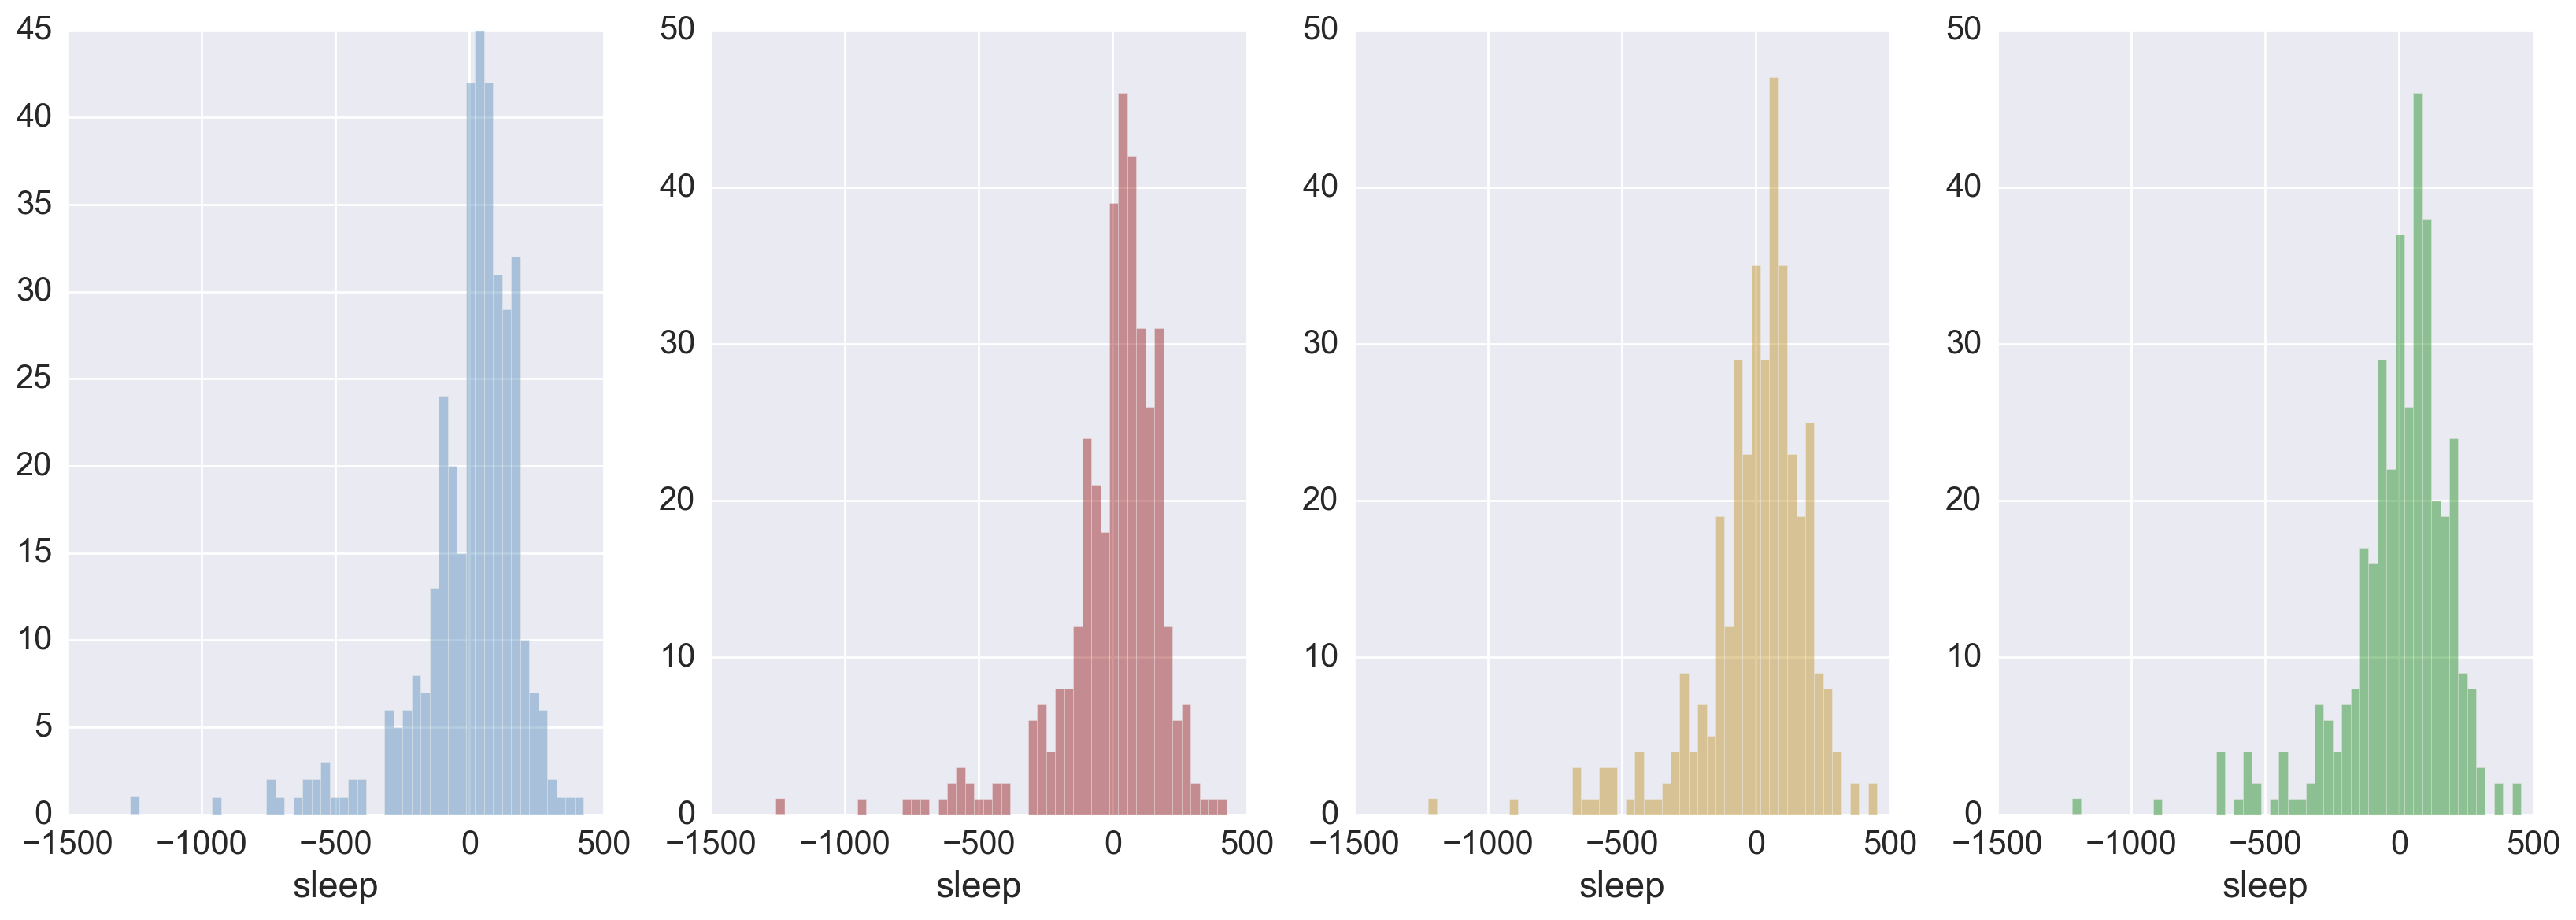

In [374]:
fig, axarr = plt.subplots(1, 4, figsize=(18, 6))

sns.distplot(ols_resd_train, bins=50, hist=True, kde=False, 
             color='steelblue', ax=axarr[0], label='OLS residuals')


sns.distplot(ridge_resd_train, bins=50, hist=True, kde=False, 
             color='darkred', ax=axarr[1], label='Ridge residuals')


sns.distplot(lasso_resd_train, bins=50, hist=True, kde=False, 
             color='darkgoldenrod', ax=axarr[2], label='Lasso residuals')

sns.distplot(enet_resd_train, bins=50, hist=True, kde=False, 
             color='g', ax=axarr[3], label='ElasticNet residuals')

plt.show()

In [375]:
# model residuals on test data:
ols_resd_test  = ytest - ytest_pred
ridge_resd_test = ytest - ytest_pred_ridge
lasso_resd_test = ytest - ytest_pred_lasso
enet_resd_test = ytest - ytest_pred_enet

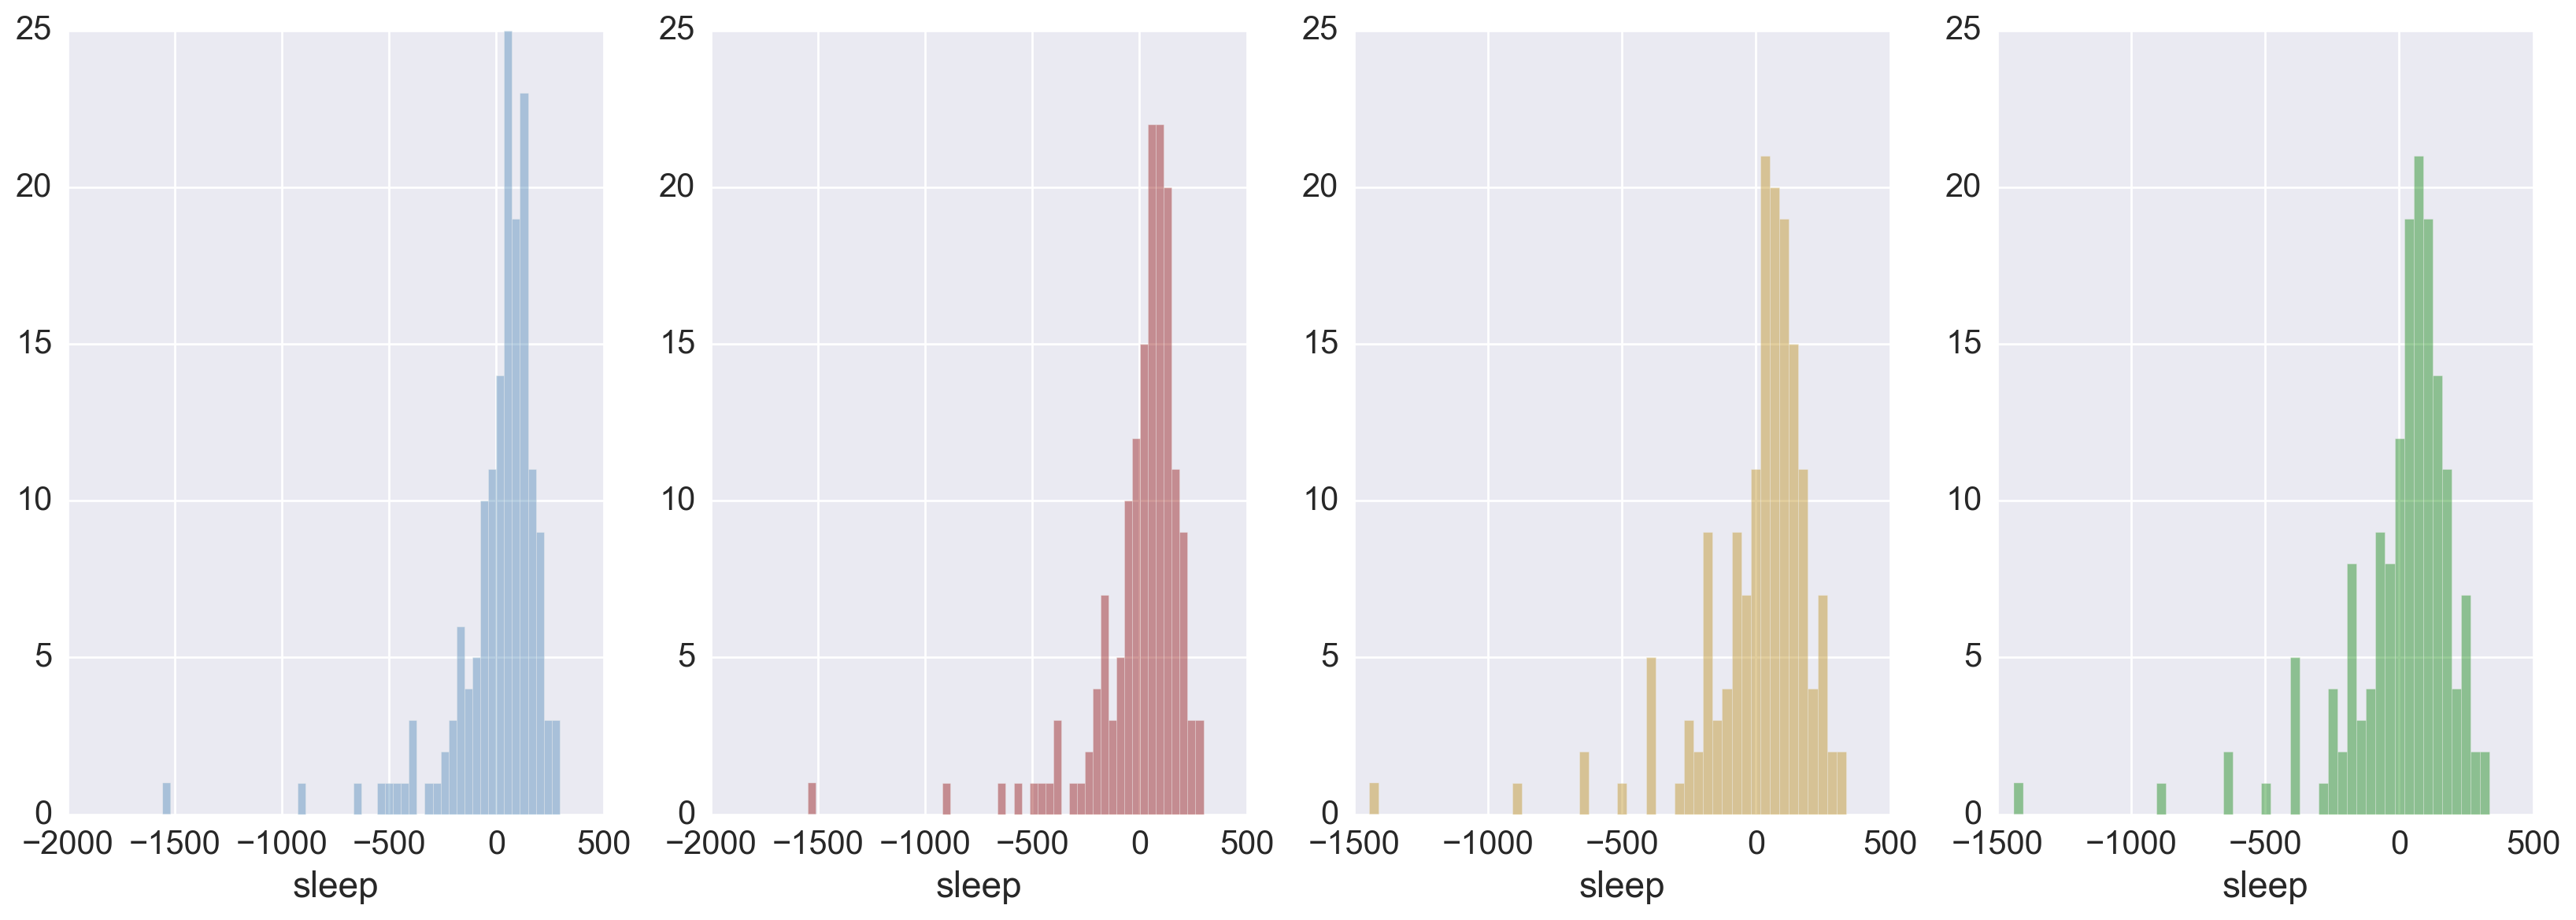

In [376]:
fig, axarr = plt.subplots(1, 4, figsize=(18, 6))

sns.distplot(ols_resd_test, bins=50, hist=True, kde=False, 
             color='steelblue', ax=axarr[0], label='OLS residuals')


sns.distplot(ridge_resd_test, bins=50, hist=True, kde=False, 
             color='darkred', ax=axarr[1], label='Ridge residuals')


sns.distplot(lasso_resd_test, bins=50, hist=True, kde=False, 
             color='darkgoldenrod', ax=axarr[2], label='Lasso residuals')

sns.distplot(enet_resd_test, bins=50, hist=True, kde=False, 
             color='g', ax=axarr[3], label='ElasticNet residuals')

plt.show()

## 4.2.4 Regression Tree 
    Gridsearch your tree
    Print the best parameters and best score from your gridsearch.
    Evaluate the performance of your tree
    Print the features that best explain your Y, are these features the same as the features you found before from the regularization methods or OLS
    
    OPTIONAL: Visualize the tree ONLY if your computer lets you do it. Your grade won't be penalized for not printing the tree, nor you will receive extra points for visualization the tree
---

In [377]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

## Here is the gridsearch
params = {"max_depth": [3,5,10,20],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 3, 5, 7, 10],
          "min_samples_split": [2, 5, 7],
           "criterion" : ['mse']
         }

## Here crossvalidate 
from sklearn.grid_search import GridSearchCV
dtr_gs = GridSearchCV(dtr, params, n_jobs=-1, cv=5, verbose=1)

In [378]:
## First of all, fit my tree 
dtr_gs.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done 472 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.8s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'auto'], 'min_samples_split': [2, 5, 7], 'criterion': ['mse'], 'max_depth': [3, 5, 10, 20], 'min_samples_leaf': [1, 3, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [379]:
## Second,Print best estimator, best parameters, and best score

In [315]:
''' dtr_best = is the regression tree regressor with best parameters/estimators'''
dtr_best = dtr_gs.best_estimator_ 

print "best estimator", dtr_best
print "\n==========\n"
print "best parameters",  dtr_gs.best_params_
print "\n==========\n"
print "best score", dtr_gs.best_score_

best estimator DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')


best parameters {'max_features': None, 'min_samples_split': 2, 'criterion': 'mse', 'max_depth': 3, 'min_samples_leaf': 1}


best score 0.778500771702


In [ ]:
### Print Feature importances

In [316]:
''' Here I am defining a function to print feature importance using best models'''
def feature_importance(X, best_model):
    feature_importance = pd.DataFrame({'feature':X.columns, 'importance':best_model.feature_importances_})
    feature_importance.sort_values('importance', ascending=False, inplace=True)
    return feature_importance  

In [317]:
feature_importance(X, dtr_best)

,feature,importance
5,slpnaps,1.0
0,agesq,0.0
1,educ,0.0
2,selfe,0.0
3,lhrwage,0.0
4,rlxall,0.0
6,totwrk,0.0
7,worknrm,0.0
8,exper,0.0


In [ ]:
### Predict

In [318]:
y_pred_dtr= dtr_best.predict(X_test)
y_pred_dtr

array([ 2881.80487805,  2881.80487805,  3304.67857143,  3101.93506494,
        3499.41818182,  3101.93506494,  3499.41818182,  3304.67857143,
        2881.80487805,  3304.67857143,  3101.93506494,  3754.83928571,
        2684.31428571,  3499.41818182,  3304.67857143,  3101.93506494,
        3304.67857143,  3304.67857143,  3101.93506494,  3101.93506494,
        3304.67857143,  3754.83928571,  3304.67857143,  3101.93506494,
        3304.67857143,  3304.67857143,  3101.93506494,  3101.93506494,
        3304.67857143,  2881.80487805,  3304.67857143,  3499.41818182,
        3101.93506494,  3754.83928571,  3304.67857143,  2881.80487805,
        3754.83928571,  3754.83928571,  3304.67857143,  3499.41818182,
        2238.45454545,  3101.93506494,  3754.83928571,  3499.41818182,
        3304.67857143,  3304.67857143,  2881.80487805,  3499.41818182,
        3754.83928571,  3101.93506494,  3101.93506494,  3101.93506494,
        3754.83928571,  3101.93506494,  2881.80487805,  3499.41818182,
      

In [ ]:
##Evaluate the performance of your model

In [319]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [320]:
def rsquare_meansquare_error(train_y, test_y, train_X, test_X, test, best_model):
    """ first we need to predict on the test and train data"""
    y_train_pred = best_model.predict(train_X)
    y_test_pred = best_model.predict(test_X)
    
    """ We call the MSE in the following lines"""
    print ('MSE ' + test + ' train data: %.2f, test data: %.2f' % (
        mean_squared_error(train_y, y_train_pred),
        mean_squared_error(test_y, y_test_pred)))
    
    """ We call the R^2 in the following lines"""
    print('R^2 ' + test + ' train data: %.2f, test data: %.2f' % (
        r2_score(train_y, y_train_pred),
        r2_score(test_y, y_test_pred)))

In [321]:
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Regression tree", dtr_best)

MSE Regression tree train data: 31371.19, test data: 40384.28
R^2 Regression tree train data: 0.83, test data: 0.77


In [ ]:
### Visualize tree

In [323]:
# Use graphviz to make a chart of the regression tree decision points:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pydot

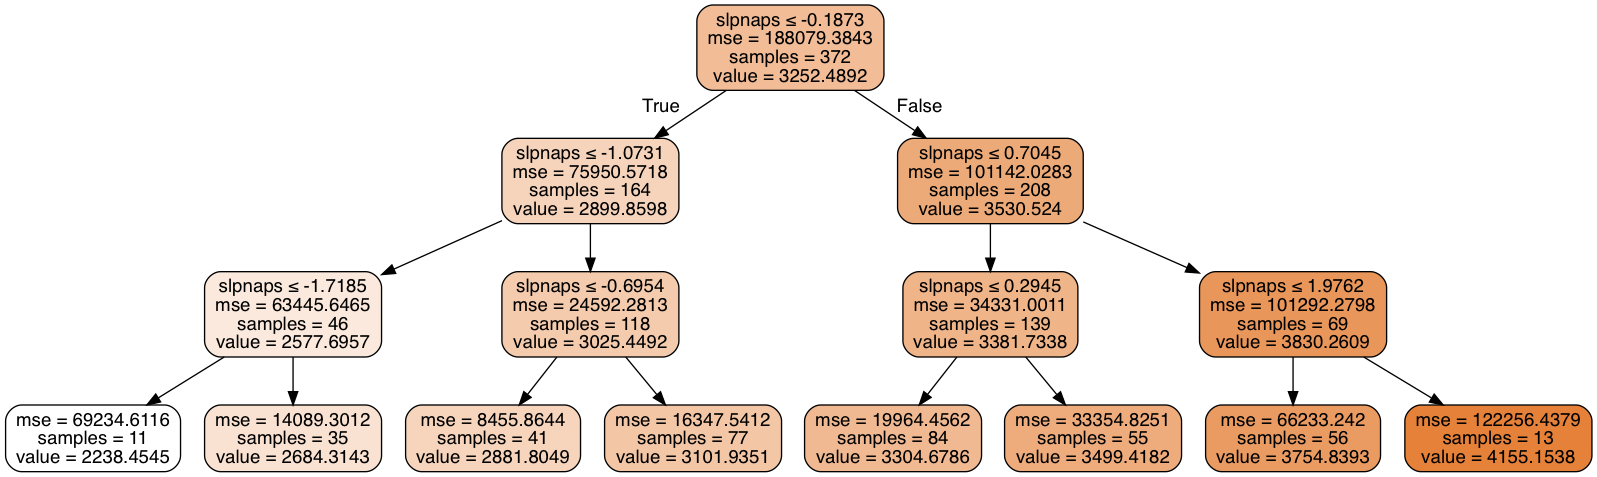

In [324]:
dot_data = StringIO()
''' dtr_best was defined before in section B'''

## Graph
export_graphviz(dtr_best, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

## 4.2.5 Random Forest Regression Tree
    Make sure you gridsearch your Random Forest
    Evaluate the performance
    Print the features that best explain mins sleep at night, per week 
---



In [325]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor( )

params = {'max_depth':[3,4,5], 
          'max_features':[2,3,4], 
          'max_leaf_nodes':[5,6,7], 
          'min_samples_split':[3,4],
         'n_estimators': [100]
         }

estimator_rfr = GridSearchCV(forest, params, n_jobs=-1,  cv=5,verbose=1)


In [ ]:
## fit Random Forest tree

In [326]:
estimator_rfr.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   29.7s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   41.5s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [2, 3, 4], 'max_leaf_nodes': [5, 6, 7], 'min_samples_split': [3, 4], 'n_estimators': [100], 'max_depth': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [ ]:
## Print best estimator, best parameters, and best score

In [327]:
rfr_best = estimator_rfr.best_estimator_
print "best estimator", rfr_best
print "\n==========\n"
print "best parameters", estimator_rfr.best_params_
print "\n==========\n"
print "best score", estimator_rfr.best_score_

best estimator RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features=4, max_leaf_nodes=7, min_samples_leaf=1,
           min_samples_split=3, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


best parameters {'max_features': 4, 'max_leaf_nodes': 7, 'min_samples_split': 3, 'n_estimators': 100, 'max_depth': 4}


best score 0.778350434723


In [ ]:
## Print Feature importances

In [328]:
feature_importance(X, rfr_best)

,feature,importance
5,slpnaps,0.518927
4,rlxall,0.412360
6,totwrk,0.035804
7,worknrm,0.017967
3,lhrwage,0.005544
1,educ,0.005461
8,exper,0.003040
0,agesq,0.000898
2,selfe,0.000000


In [ ]:
## Predict

In [329]:
y_pred_rfdtr= rfr_best.predict(X_test)
y_pred_rfdtr

array([ 2759.65729927,  2899.99741674,  3404.00929655,  3075.48073705,
        3527.58174622,  3159.95438764,  3486.72057849,  3332.1134527 ,
        2861.78694259,  3412.43268278,  3122.25193265,  3714.02984594,
        2760.34658048,  3431.38620267,  3400.98300548,  3134.12629914,
        3215.13616825,  3203.04625793,  3079.36988095,  3092.97780105,
        3416.459478  ,  3746.77841964,  3192.61833007,  3287.70802639,
        3414.09752619,  3394.61580733,  3068.10584782,  3275.92623499,
        3424.41357072,  2959.38460985,  3410.04762397,  3502.2303855 ,
        3141.35889197,  3729.97214732,  3333.45421475,  2878.12891961,
        3753.94566855,  3863.38088621,  3409.50648677,  3454.48421028,
        2550.8941199 ,  3111.14933251,  3733.89099141,  3452.52593531,
        3225.45833527,  3481.1799492 ,  2845.57699007,  3579.71617746,
        3795.49003111,  3150.07360489,  3130.08887627,  3151.19229446,
        3576.13723594,  3122.70520842,  2843.92284948,  3443.11560778,
      

In [ ]:
## Evaluate the performance of your model

In [330]:
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Random Forest Regression tree", rfr_best)

MSE Random Forest Regression tree train data: 31690.40, test data: 44104.61
R^2 Random Forest Regression tree train data: 0.83, test data: 0.75


## 5. Based on the MSE and R^2, in your opinion which model perform best and why?
---

MSE is the mean square error, the bigger the MSE, the worse perform of the model.
R^2 means how much the data is explained by the model, the higher, the better.
In 4.2.2, We've known that OLS perform the best compared to Lasso, Ridge and EV.And MSE=38479.31,R^2=0.8 in training data =0.74 in test data.
In regression tree: MSE=31371, R^2=0.83 in training data and =0.77 in test data
In random forest regression Tree: MSE=31690,R^2=0.82 in training data and =0.75 in test data
In my opinion, regression tree model perform best, because the MSE of regression tree is the lowest and R^2 in training data is the highest.

## 6. Was there any trade off between bias and variance whem implementing the models?
    
---

ANS:
If the model is overfitted,it will has a high variance;If the model is underfitted, it will has bias. 
Overfitting refers to a model that models the training data too well.In this research, we should focus on how to eliminate overfitted, because MES of all of the model are very high.

## 7. Explain the Bias Variance trade in the model you selected?
    
---

ANS:

In [ ]:
### In the research,there are high MSE in all of the model,which means models are overfitted, we should go back to see heatmap agian.
### The X variables may have correaltion to each other,this will cause bias in the prediction.